c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


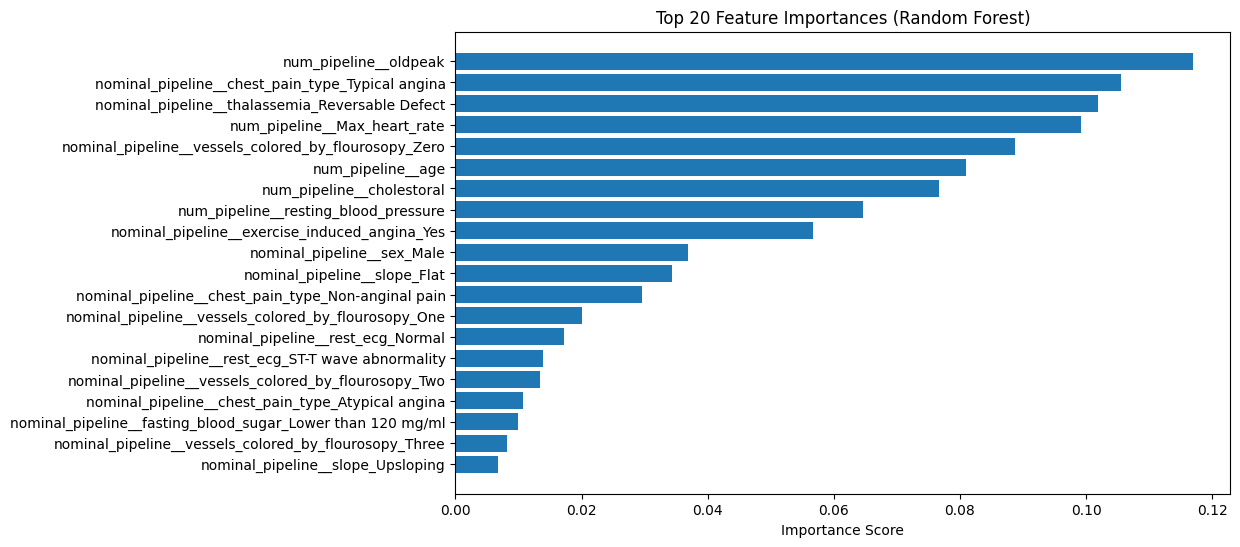

In [1]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x_train_prep = 'E:/Heart_Disease_Project/data/x_train_prep.csv'
x_test_prep = 'E:/Heart_Disease_Project/data/x_test_prep.csv'
y_train = 'E:/Heart_Disease_Project/data/y_train.csv'

x_train_prep = pd.read_csv(x_train_prep)
x_test_prep = pd.read_csv(x_test_prep)
y_train = pd.read_csv(y_train)

# Train a Random Forest model (use classifier or regressor depending on y_train type)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_prep, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = x_train_prep.columns

# Create dataframe
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'][:20], feat_importance_df['Importance'][:20])  # Top 20
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression for RFE (you can also try RF/XGB)
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=15)  # choose how many features you want
rfe_fit = rfe.fit(x_train_prep, y_train)

# Selected features
selected_features_rfe = x_train_prep.columns[rfe_fit.support_]
print("Selected Features (RFE):", selected_features_rfe.tolist())

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConve

Selected Features (RFE): ['num_pipeline__Max_heart_rate', 'num_pipeline__oldpeak', 'nominal_pipeline__sex_Male', 'nominal_pipeline__chest_pain_type_Atypical angina', 'nominal_pipeline__chest_pain_type_Typical angina', 'nominal_pipeline__rest_ecg_ST-T wave abnormality', 'nominal_pipeline__exercise_induced_angina_Yes', 'nominal_pipeline__slope_Flat', 'nominal_pipeline__slope_Upsloping', 'nominal_pipeline__vessels_colored_by_flourosopy_One', 'nominal_pipeline__vessels_colored_by_flourosopy_Three', 'nominal_pipeline__vessels_colored_by_flourosopy_Two', 'nominal_pipeline__vessels_colored_by_flourosopy_Zero', 'nominal_pipeline__thalassemia_No', 'nominal_pipeline__thalassemia_Reversable Defect']


In [3]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Scale features to non-negative for Chi2
x_train_chi2 = MinMaxScaler().fit_transform(x_train_prep)

chi_scores, p_values = chi2(x_train_chi2, y_train)

chi2_df = pd.DataFrame({
    "Feature": x_train_prep.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values("Chi2 Score", ascending=False)

print(chi2_df.head(20))  # top features

                                              Feature  Chi2 Score  \
21    nominal_pipeline__thalassemia_Reversable Defect  113.502388   
8    nominal_pipeline__chest_pain_type_Typical angina  111.835295   
12      nominal_pipeline__exercise_induced_angina_Yes  110.615891   
18  nominal_pipeline__vessels_colored_by_flourosop...   72.287063   
7   nominal_pipeline__chest_pain_type_Non-anginal ...   65.252389   
13                       nominal_pipeline__slope_Flat   50.977662   
17  nominal_pipeline__vessels_colored_by_flourosop...   48.495559   
4                               num_pipeline__oldpeak   44.614909   
6   nominal_pipeline__chest_pain_type_Atypical angina   39.455670   
15  nominal_pipeline__vessels_colored_by_flourosop...   36.028569   
16  nominal_pipeline__vessels_colored_by_flourosop...   31.053043   
5                          nominal_pipeline__sex_Male   19.682345   
11   nominal_pipeline__rest_ecg_ST-T wave abnormality   13.955097   
10                  nominal_pipeli

In [4]:
# Example: keep top 20 from RF + those selected by RFE
top_rf_features = feat_importance_df['Feature'].head(20).tolist()
final_features = list(set(top_rf_features) | set(selected_features_rfe))

x_train_reduced = x_train_prep[final_features]
x_test_reduced = x_test_prep[final_features]

# Save reduced dataset
x_train_reduced.to_csv('x_train_reduced.csv', index=False)
x_test_reduced.to_csv('x_test_reduced.csv', index=False)